In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("Fraud.csv") # To read the dataset
df.head()                     #Shows first 5 rows of the dataset


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
df.info()                   # Gives column names, data types, and non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341239 entries, 0 to 5341238
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 448.3+ MB


In [7]:
df.describe()              # Gives Summary of numeric columns


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.341239e+06,5.341239e+06,5.341239e+06,5.341239e+06,5.341238e+06,5.341238e+06,5.341238e+06,5.341238e+06
mean,2.024611e+02,1.814055e+05,8.428359e+05,8.647494e+05,1.079423e+06,1.208835e+06,7.824029e-04,5.616675e-07
std,1.088839e+02,6.327558e+05,2.922660e+06,2.959474e+06,3.230759e+06,3.555776e+06,2.796052e-02,7.494447e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.370000e+02,1.331781e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.100000e+02,7.542765e+04,1.396800e+04,0.000000e+00,1.356913e+05,2.186002e+05,0.000000e+00,0.000000e+00
75%,2.980000e+02,2.096999e+05,1.075378e+05,1.455717e+05,9.461412e+05,1.119090e+06,0.000000e+00,0.000000e+00
max,3.740000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.555534e+08,3.555534e+08,1.000000e+00,1.000000e+00


In [8]:
df.isnull().sum()       # Checks how many missing values are in each column.


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [10]:
df.duplicated().sum()          # Counts duplicate rows, which should be removed if found
  


np.int64(0)

In [12]:
print(df.columns)             # shows all the columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [14]:
df[['isFraud', 'isFlaggedFraud']].value_counts(normalize=True)   # Checks the ratio of fraud vs non-fraud cases


isFraud  isFlaggedFraud
0.0      0.0               9.992176e-01
1.0      0.0               7.818412e-04
         1.0               5.616675e-07
Name: proportion, dtype: float64

In [15]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)    


In [16]:
df[['isFraud', 'isFlaggedFraud']].value_counts(normalize=True)  #for float values 

isFraud   isFlaggedFraud
0.000000  0.000000         0.999218
1.000000  0.000000         0.000782
          1.000000         0.000001
Name: proportion, dtype: float64

# Data Cleaning

In [18]:
df[['oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].isnull().sum()    # checking for null


oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [19]:
df['oldbalanceDest'].fillna(df['oldbalanceDest'].median(), inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].median(), inplace=True)

df['isFraud'].fillna(0, inplace=True)          #  i am Assuming that there will be no fraud
df['isFlaggedFraud'].fillna(0, inplace=True)   # Assume not flagged


C:\Users\itsme\AppData\Local\Temp\ipykernel_1804\1685285666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldbalanceDest'].fillna(df['oldbalanceDest'].median(), inplace=True)
C:\Users\itsme\AppData\Local\Temp\ipykernel_1804\1685285666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [20]:
df[['oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].isnull().sum() # checking for null again


oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

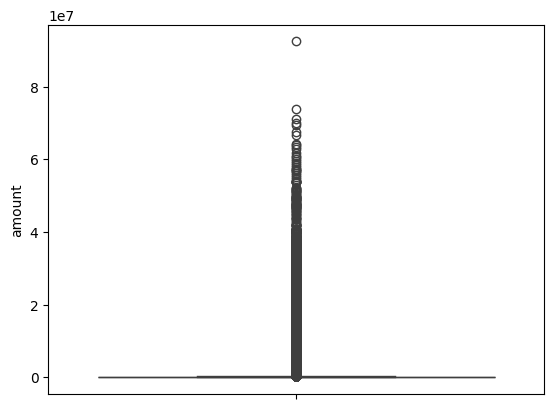

In [22]:
sns.boxplot(df['amount'])   # checking for outlires
Q1 = df['amount'].quantile(0.25)     # Shows outliers in the transaction amount using a boxplot.
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [31]:
df['isIllegal'] = df['amount'].apply(lambda x: 1 if x > 200000 else 0)      # new column for illegal attempt
print(df.columns) 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isIllegal'],
      dtype='object')


In [33]:
df['isIllegal'].value_counts()                      #  Count how many illegal transactions there are   


isIllegal
0    3928686
1    1412553
Name: count, dtype: int64

In [34]:
illegal_percentage = df['isIllegal'].mean() * 100                      # Percentage of illegal attempts
print(f"Percentage of illegal transactions: {illegal_percentage:.4f}%")

Percentage of illegal transactions: 26.4462%


In [35]:
illegal_fraud_ratio = df[(df['isIllegal'] == 1) & (df['isFraud'] == 1)].shape[0] / df[df['isIllegal'] == 1].shape[0]   # calculation of the fraud rate       
print(f"Fraud rate among illegal transactions: {illegal_fraud_ratio:.4f}")


Fraud rate among illegal transactions: 0.0019


# Multicollinearity Check


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    # This helps to calculate multicollinearity for numeric features.

# Remove target and keep only numeric columns
X_temp = df.drop('isFraud', axis=1).select_dtypes(include=['number'])

#   it Creates an empty DataFrame vif to store the final VIF results
vif = pd.DataFrame()

#  Builds a linear regression of that column vs all other columns and Calculates how strongly that column is explained by the others
vif["VIF Factor"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]    

# Adds a second column
vif["features"] = X_temp.columns
vif


,VIF Factor,features
0,1.347561,step
1,4.451345,amount
2,651.515271,oldbalanceOrg
3,654.713907,newbalanceOrig
4,59.934931,oldbalanceDest
5,71.510054,newbalanceDest
6,1.000026,isFlaggedFraud
7,1.517199,isIllegal


# Handle Imbalanced Data with SMOTE

In [52]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [54]:
# Drop high-cardinality columns like 'nameOrig', 'nameDest'
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)  # Drop string-heavy columns
y = df['isFraud']


In [55]:
#One-hot encode low-cardinality categorical columns
X = pd.get_dummies(X, columns=['type'])  # Only 'type' encode karna hai



In [56]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [57]:
# SMOTE
# Synthetic Minority Over-sampling Technique
# Ye ek technique hai jo imbalanced datasets me minority class ke naye synthetic (nakli) examples generate karti hai lekin random nahi, existing data ke base par smartly.

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [59]:
# SMOTE ke baad ka X_res and y_res ko DataFrame me convert karne ke baad
X_res_df = pd.DataFrame(X_res, columns=X.columns)
y_res_df = pd.Series(y_res, name='isFraud')

# Merging to see
df_resampled = pd.concat([X_res_df, y_res_df], axis=1)

df_resampled.head()            
# StandardScaler() use karne ki vajah se sabhi features ko mean = 0 aur std = 1 ke around scale karta hai Isliye values positive bhi ho sakti hain, negative bhi 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isIllegal,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,-1.850238,-0.271141,-0.230167,-0.238033,-0.334108,-0.339964,-0.000749,-0.599624,-0.530468,-0.739761,-0.080365,1.402009,-0.301041,0.000000
1,-1.850238,-0.283745,-0.281109,-0.285647,-0.334108,-0.339964,-0.000749,-0.599624,-0.530468,-0.739761,-0.080365,1.402009,-0.301041,0.000000
2,-1.850238,-0.286405,-0.288318,-0.292197,-0.334108,-0.339964,-0.000749,-0.599624,-0.530468,-0.739761,-0.080365,-0.713262,3.321811,1.000000
3,-1.850238,-0.286405,-0.288318,-0.292197,-0.327552,-0.339964,-0.000749,-0.599624,-0.530468,1.351789,-0.080365,-0.713262,-0.301041,1.000000
4,-1.850238,-0.268251,-0.274162,-0.282099,-0.334108,-0.339964,-0.000749,-0.599624,-0.530468,-0.739761,-0.080365,1.402009,-0.301041,0.000000


# Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split    

# splitting your balanced dataset into two parts: 70% for training (X_train, y_train) and 30% for testing (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)



# Model Building XGBoost

## XGBoost

In [68]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.9 MB/s eta 0:01:21
   ---------------------------------------- 0.8/150.0 MB 1.9 MB/s eta 0:01:18
   ---------------------------------------- 1.3/150.0 MB 1.9 MB/s eta 0:01:18
   ---------------------------------------- 1.6/150.0 MB 1.9 MB/s eta 0:01:18
    --------------------------------------- 2.1/150.0 MB 1.9 MB/s eta 0:01:18
    --------------------------------------- 2.4/150.0 MB 1.9 MB/s eta 0:01:19
    --------------------------------------- 2.9/150.0 MB 1.9 MB/s eta 0:01:18
    --------------------------------------- 3.1/150.0 MB 1.9 MB/s eta 0:01:18
    --------------------------------------- 3.7/150.0 MB 1.9 MB/s eta 0:01:18
   - -------------------------------------- 3.9/150.0 MB 1.9 MB/s eta 0:01:17
   - -------------------------------------- 4.5/150.0 MB 1.9 MB/s eta 0:01:17
   - -------------------------------------- 4.7/150.0 MB 1.9 MB/s eta 0


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
# model evaluation ke liye
from xgboost import XGBClassifier

In [72]:
# sari input columns (feature columns), except isFraud and string-heavy columns (nameOrig, nameDest)
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)  

 # target column (output) = fraud (1) ya not fraud (0)
y = df['isFraud']                    


In [75]:
 # One-hot encode the 'type' column
X = pd.get_dummies(X, columns=['type'], drop_first=True)

In [76]:
# STEP 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [77]:
# STEP 4: Balance the data using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)


In [78]:
# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)


In [82]:
# STEP 6: Train the XGBoost model
model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Prediction and Evaluation

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
# Predict on test set
y_pred = model.predict(X_test)

In [85]:
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1595925    5193]
 [   1957 1599161]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1601118
         1.0       1.00      1.00      1.00   1601118

    accuracy                           1.00   3202236
   macro avg       1.00      1.00      1.00   3202236
weighted avg       1.00      1.00      1.00   3202236



In [86]:
from sklearn.metrics import roc_curve, roc_auc_score


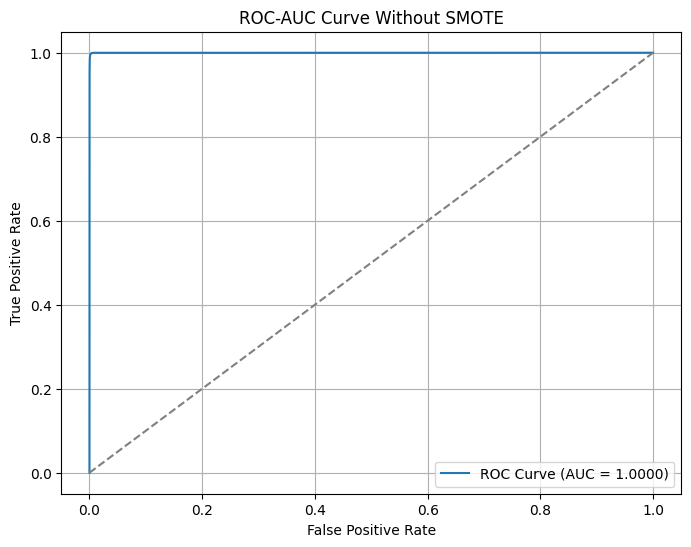

In [88]:
# 1. Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2. Import ROC functions
from sklearn.metrics import roc_curve, roc_auc_score

# 3. Plot ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.4f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Without SMOTE")
plt.legend()
plt.grid(True)
plt.show()



